# Orlando Business Benchmark

Index

Introduction    

Crawling Wikipedia with Beautiful Soup

Geocoder and Folium use of the Location Data

Segmentation and Clustering using Foursquare API


Clustering Neighborhoods by Types of Venues

Segmentation by Venue Category

Conclusions

# Introduction

The Orlando area is explored for business opportunities using the Foursquare API. To do that, Wikipedia is scraped for the neighborhood names of the area and Geocoder is used to extract the coordinates of each neighborhood.
Then with the coordinates for the neighborhoods the Foursquare API is used to get the most common categories of venues in these
neighborhoods and thus bring some conclusions as to whether there are any unmet needs in the area that could be satisfied through an entrepreneurship project.
 
The Foursquare API is leveraged through its different features in order to explore the area and find new insights and Geocoder is used to find the coordinates of some neighborhoods in Orlando that where scraped from Wikipedia.


# Beautifulsoup on Wikipedia

Wikipedia contained a list of neighborhoods for Orlando. This list was contained in a table so a loop was used to extract the 'td' elements in the html. Further preparation of the data was done in excel and the clean data was reuploaded through a CSV.

In [1]:
# import requests
# import lxml
# ! pip install BeautifulSoup
# from bs4 import BeautifulSoup
#!conda install -c anaconda beautifulsoup4 -y

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
import requests
import logging
import time
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# wikipedia_link='https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Orlando,_Florida'
# raw_wikipedia_page = requests.get(wikipedia_link)
# page= raw_wikipedia_page.text
# soup= BeautifulSoup(page,'lxml')

#  orlando_data_saved=""
# for table in soup.find_all('tr'):
#     orlando_data=""
#     for data in soup.find_all ('td'):
#         orlando_data=orlando_data+", " + data.text
#     orlando_data_saved=orlando_data_saved + "\n" + orlando_data[1:]
# print(orlando_data_saved)

# import types
# import pandas as pd
# from botocore.client import Config
# import ibm_boto3

# def __iter__(self): return 0
# # @hidden_cell
# # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# # You might want to remove those credentials before you share your notebook.
# client_d7ed87afa44d408a9b8e177415c30a0f = ibm_boto3.client(service_name='s3',
#     ibm_api_key_id='2k77yQVNoqPQlLAbYpHZXtSX5uF9dCXRHqXkpDwCSI_A',
#     ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
#     config=Config(signature_version='oauth'),
#     endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

# body = client_d7ed87afa44d408a9b8e177415c30a0f.get_object(Bucket='machinelearningassignment-donotdelete-pr-iub7c6ptajxd4l',Key='venues_orlando.csv')['Body']
# # add missing __iter__ method, so pandas accepts body as file-like object
# if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )




Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

#     Geocoder and Folium use of the Location Data


In [11]:
address = 'Orlando, FL'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
or_latitude = location.latitude
or_longitude = location.longitude
print('The geograpical coordinate of Orlando are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Orlando are 28.756618, -81.3388838221417.


In [18]:
df_ornelat = pd.read_csv('ornela.csv')
df_ornelat.head()

,Neighborhood,Latitude,Longitude
0,Beltway Commerce Center,28.476013,-81.232845
1,East Park,28.423651,-81.235694
2,Narcoossee South,28.350192,-81.237217
3,Randal Park,28.439583,-81.237243
4,LaVina,28.427868,-81.249406


With a clean list of the neighborhoods we proceed to start the geocoder and mapping processes of the neighborhoods. We add the string ", Florida" to the neighborhoods in order to improve accuracy of the location.

Then we start using a loop to obtain the coordinates of each neighborhood making sure to use a time.sleep of 0.45 so the geocoder does not kick our calls out.

After having the appropiate latitude and longitude variables we proceed to map the neighborhoods using folium adding a circle marker to each neighborhood point on the map.

In [15]:
df_ornelat['Neighborhood'] = df_ornelat['Neighborhood'].astype(str) + ', Florida'
list_orne=df_ornelat['Neighborhood'].tolist()

In [15]:
addressess = list_orne

for address in addressess:
                geolocator = Nominatim(user_agent="FL_explorer")
                location = geolocator.geocode(address)
                latitude = location.latitude
                longitude = location.longitude
                time.sleep(.45)
                #print(address,'{}, {}'.format(latitude, longitude)," " )

In [12]:
map_orlando = folium.Map(location=[or_latitude, or_longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_ornelat['Latitude'], df_ornelat['Longitude'], df_ornelat['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_orlando)  
    
map_orlando

# Segmenting/Clustering using Foursquare

In [22]:
CLIENT_ID = '4ENNW1RCDJAPTDQBAWYUBHHRENNPKUCTFYAL2WJTWHWGUGKW' # your Foursquare ID
CLIENT_SECRET = 'QO1KGCPGFCOZPSVFRGXBUX5X3WEZZKTH015JQF3KWDPOEZDL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4ENNW1RCDJAPTDQBAWYUBHHRENNPKUCTFYAL2WJTWHWGUGKW
CLIENT_SECRET:QO1KGCPGFCOZPSVFRGXBUX5X3WEZZKTH015JQF3KWDPOEZDL


We start by using a Foursquare API calls function. In this function we are interested in finding the categories of each venue so we can generalize what types of venues there are in the area and process a lot more information by grouping all the venues according to their category. 

The Foursqare API uses the latitude and longitude variables that we geocoded earlier, as well as limit which assigns the maximum amount of requests, and the radius of each call according to coordinates which is in meters.

Then we use a get_category_type function to extract the venue categories from the json that was sent by the Foursquare API.

We manipulate the json file further and get each venues name, its category and the its corresponding neighborhood.

In [19]:
LIMIT = 500
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
orne_venues = getNearbyVenues(names=df_ornelat['Neighborhood'],
                                   latitudes=df_ornelat['Latitude'],
                                   longitudes=df_ornelat['Longitude']
                                  )


 Beltway Commerce Center
 East Park
 Narcoossee South
 Randal Park
 LaVina
 Bal Bay
 Bel Air
 Vista East
 Lake Nona Estates
 Lake Nona South
 NorthLake Park at Lake Nona
 City of Orlando/GOAA
 Lake Nona Central
 Ventura
Airport North
 Engelwood Park
 Azalea Park
 Countryside
 Orlando International Airport
 Lake Fredrica
 South Semoran
 Dixie Belle
 Boggy Creek
 Dover Manor
 Bryn Mawr
 The Dovers
 Mariners Village
 Dover Estates
 Baldwin Park
 Dover Shores East
 Conway
 Orlando Executive Airport
 Crescent Park
 Wedgewood Groves
 Dover Shores West
 Lake Underhill
 Colonial Town Center
 Audubon Park
 East Central Park
 Coytown
 Colonialtown North
 Colonialtown South
 Rowena Gardens
 Lawsona/Fern Creek
 Rose Isle
 Lake Weldona
 Lake Davis/Greenwood
 Lancaster Park
 Thornton Park
 Pineloch
 Orwin Manor
 Southern Oaks
 Lake Formosa
 Wadeview Park
 Park Lake/Highland
 Delaney Park
 Lake Cherokee
 Lake Copeland
 South Orange
 Lake Holden
 South Division
 Lake Dot
 Holden Heights
 Holden/Parram

In [23]:
print(orne_venues.shape)
orne_count=orne_venues.groupby('Neighborhood').count()
orne_count.head()

(3203, 7)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Audubon Park,56,56,56,56,56,56
Azalea Park,10,10,10,10,10,10
Bal Bay,8,8,8,8,8,8
Baldwin Park,25,25,25,25,25,25
Bel Air,6,6,6,6,6,6


By using a radius of 1000 meters to look on the Foursquare API we are able to extract around 3000 venues which gives a more robust dataset, and with that quantity of information the analysis becomes more interesting.

In [24]:
print('There are {} uniques categories.'.format(len(orne_venues['Venue Category'].unique())))

There are 297 uniques categories.


In order to segment or cluster the data we convert the categorical values into numerical values. We achieve this by applying one hot encoding to the Venue Category column, thus creating a dataframe that measures how often there is a specific category of venue in each neighborhood.

However, we need to process the data further in order to see some concrete conclusions.

In [25]:
# one hot encoding
orne_onehot = pd.get_dummies(orne_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
orne_onehot['Neighborhood'] = orne_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [orne_onehot.columns[-1]] + list(orne_onehot.columns[:-1])
orne_onehot = orne_onehot[fixed_columns]
orne_onehot=orne_onehot.set_index('Neighborhood').reset_index()

orne_grouped = orne_onehot.groupby('Neighborhood').mean().reset_index()
orne_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Cemetery,Check Cashing Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoor Supply Store,Outlet Mall,Outlet Store,Paintball Field,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pool,Print Shop,Professional & Other Places,Pub,Public Art,Ramen Restaurant,Real Estate Office,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Toll Booth,Toll Plaza,Tourist Information 

Through this loop we can visualize the top 5 venue categories in each neighborhood. It gives us a first glance into the data organized in a way that allows for some initial conclusions about the dataset.

If we look at the top 5 venue categories for the neighborhood Lake Buena Vista, we can confirm that it's top venues are clothing stores, resorts, gift shops, restaurants and theme parks. This is aligned with the reality of the neighborhood because it is the neighborhood adjacent to the Disney Theme Parks.

Thus we can assume that there is good credibility to the data we have and we can trust the processes we performed so far.

In [26]:
num_top_venues = 5

for hoods in orne_grouped['Neighborhood']:
    print("----"+hoods+"----")
    temp = orne_grouped[orne_grouped['Neighborhood'] == hoods].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Audubon Park----
              venue  freq
0            Bakery  0.05
1              Park  0.04
2       Karaoke Bar  0.04
3  Sushi Restaurant  0.04
4       Coffee Shop  0.04


---- Azalea Park----
                       venue  freq
0           Cuban Restaurant   0.2
1          Convenience Store   0.1
2           Arepa Restaurant   0.1
3  South American Restaurant   0.1
4            Automotive Shop   0.1


---- Bal Bay----
         venue  freq
0  Yoga Studio  0.12
1  Art Gallery  0.12
2         Pool  0.12
3      Dog Run  0.12
4       Office  0.12


---- Baldwin Park----
          venue  freq
0          Park  0.12
1    Restaurant  0.04
2       Dog Run  0.04
3       Brewery  0.04
4  Burger Joint  0.04


---- Bel Air----
              venue  freq
0    Baseball Field  0.33
1    Discount Store  0.17
2  Baseball Stadium  0.17
3    Breakfast Spot  0.17
4              Park  0.17


---- Boggy Creek----
                        venue  freq
0           Convenience Store  0.33
1  Construction & 

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Displaying a table of the 10 most common venues will help when we try to cluster the neighborhoods by similar venues. However, as we will see clustering helps partially. Mostly to get more familiar with the data, however, it will not help us much in drawing conclusions. 

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = orne_grouped['Neighborhood']

for ind in np.arange(orne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(orne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Audubon Park,Bakery,Clothing Store,Sushi Restaurant,Karaoke Bar,Department Store,Park,Coffee Shop,Gas Station,Accessories Store,Record Shop
1,Azalea Park,Cuban Restaurant,Construction & Landscaping,Arepa Restaurant,Latin American Restaurant,Automotive Shop,Office,Baseball Field,South American Restaurant,Convenience Store,Fish Market
2,Bal Bay,Yoga Studio,Cosmetics Shop,Dog Run,American Restaurant,Steakhouse,Art Gallery,Pool,Office,Fast Food Restaurant,Ethiopian Restaurant
3,Baldwin Park,Park,Mexican Restaurant,Light Rail Station,Pharmacy,Restaurant,Sandwich Place,Candy Store,Dog Run,Burger Joint,Smoothie Shop
4,Bel Air,Baseball Field,Park,Baseball Stadium,Breakfast Spot,Discount Store,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Farmers Market


# CLUSTERING NEIGHBORHOODS BY TYPES OF VENUE

We run some clustering tests iteratively, in order to find the best number of k clusters. After using the elbow method for inertia, we see that a set of 3 clusters is probably the optimal amount of clusters. However experimenting with different amount of clusters anywhere from 10 or more clusters allows us to see that there are some neighborhoods with similar characteristics, and allows us to see that restaurants are common as well as gyms. Some neighborhoods also have parks, yoga studios, or stores as their main venues.

This suggests that in the Orlando area, customers are interested mostly in food venues, but less intuitively they are also interested in fitness-health venues, which directs us to look at the possibility of exploring a food-health business project.

In addition, there are is very few amount of vegetarian-vegan restaurants locally which would also provide an interesting niche for a restaurant. The neighborhoods where we can find these vegetarian/vegan restaurants are: Dover Manor, East Central Park, Colonialtown North, Colonialtown South, Park Lake/Highland, Lake Fairview, and Millenia.

In [80]:
orne_vegan = orne_venues.loc[orne_venues['Venue Category'] == 'Vegetarian / Vegan Restaurant', orne_venues.columns[[0] + list(range(1, orne_venues.shape[1]))]]
orne_vegan

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
293,Dover Manor,28.528020,-81.321284,Julia's Hippy House,28.527882,-81.329315,Vegetarian / Vegan Restaurant
694,East Central Park,28.544392,-81.347801,Market on South,28.538852,-81.349367,Vegetarian / Vegan Restaurant
701,East Central Park,28.544392,-81.347801,Dixie Dharma,28.538901,-81.349400,Vegetarian / Vegan Restaurant
871,Colonialtown North,28.560465,-81.358061,The Sanctum Cafe,28.553760,-81.360090,Vegetarian / Vegan Restaurant
959,Colonialtown South,28.549063,-81.358190,The Sanctum Cafe,28.553760,-81.360090,Vegetarian / Vegan Restaurant
985,Colonialtown South,28.549063,-81.358190,Veggie Garden,28.553002,-81.363812,Vegetarian / Vegan Restaurant
1566,Park Lake/Highland,28.558622,-81.369055,Veggie Garden,28.553002,-81.363812,Vegetarian / Vegan Restaurant
2111,Lake Fairview,28.600709,-81.411018,Dajen Eats Cafe And Creamery,28.602378,-81.418691,Vegetarian / Vegan Restaurant
2361,Millenia,28.488299,-81.432327,Maoz Vegetarian,28.485192,-81.431969,Vegetarian / Vegan Restaurant


In [55]:
# set number of clusters
kclusters = 3

orne_grouped_clustering = orne_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(orne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int32)

In [32]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(orne_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)


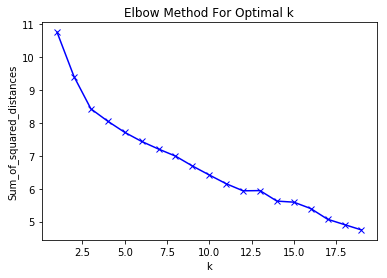

In [35]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The Elbow Method does not show a strong elbow, however it seems to happen at k=3. 

In [56]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

orne_merged = df_ornelat

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
orne_merged = orne_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
orne_merged=orne_merged.dropna(axis=0)
orne_merged['Cluster Labels']=orne_merged['Cluster Labels'].astype(int)

In [65]:
orne_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,East Park,28.423651,-81.235694,0,Park,Fast Food Restaurant,Lake,Trail,Construction & Landscaping,Convenience Store,Fishing Spot,Fish Market,Fish & Chips Shop,Financial or Legal Service
2,Narcoossee South,28.350192,-81.237217,1,Convenience Store,Sandwich Place,Gym / Fitness Center,Electronics Store,Building,Fast Food Restaurant,Furniture / Home Store,Clothing Store,Financial or Legal Service,Fish & Chips Shop
3,Randal Park,28.439583,-81.237243,0,Park,Mexican Restaurant,Playground,Farmers Market,Drugstore,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop
4,LaVina,28.427868,-81.249406,1,Pizza Place,Theme Restaurant,Smoothie Shop,Tex-Mex Restaurant,Business Service,Sushi Restaurant,Frozen Yogurt Shop,Bank,Bakery,Sandwich Place
5,Bal Bay,28.443361,-81.252563,1,Yoga Studio,Cosmetics Shop,Dog Run,American Restaurant,Steakhouse,Art Gallery,Pool,Office,Fast Food Restaurant,Ethiopian Restaurant


In [58]:
# create map
map_clusters = folium.Map(location=[or_latitude, or_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(orne_merged['Latitude'], orne_merged['Longitude'], orne_merged['Neighborhood'], orne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

At technically 3 clusters we can see that neighborhoods are distributed in mainly two clusters. 22 neighborhoods that have Parks as their main Venue, and 88 that have stores, restaurants and pretty much most types of venues. So this clustering did not help in developing specific solutions to our initial problem.

In [105]:
cluster_num=1
cluster=orne_merged.loc[orne_merged['Cluster Labels'] == cluster_num, orne_merged.columns[[0] + list(range(4, orne_merged.shape[1]))]]
print(cluster.shape)
cluster.head()



(88, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Narcoossee South,Convenience Store,Sandwich Place,Gym / Fitness Center,Electronics Store,Building,Fast Food Restaurant,Furniture / Home Store,Clothing Store,Financial or Legal Service,Fish & Chips Shop
4,LaVina,Pizza Place,Theme Restaurant,Smoothie Shop,Tex-Mex Restaurant,Business Service,Sushi Restaurant,Frozen Yogurt Shop,Bank,Bakery,Sandwich Place
5,Bal Bay,Yoga Studio,Cosmetics Shop,Dog Run,American Restaurant,Steakhouse,Art Gallery,Pool,Office,Fast Food Restaurant,Ethiopian Restaurant
7,Vista East,Athletics & Sports,Bank,Gym,Pool,Salon / Barbershop,Pet Store,Photography Studio,Pizza Place,Women's Store,Drugstore
8,Lake Nona Estates,Golf Course,Gym / Fitness Center,American Restaurant,Market,Home Service,Athletics & Sports,Fabric Shop,Drugstore,Dry Cleaner,Electronics Store


"Dover Manor", "East Central Park", "Colonialtown North", "Colonialtown South", "Park Lake/Highland", "Lake Fairview" and "Millenia" are the neighborhoods with Vegetarian / Vegan restaurants from our list of neighborhoods.

# Segmenting by Venue Category

Due to the limited amount of insight provided by the segmentation and clustering by neighborhood, we proceed to segment the data by venue category thus showing what are the most common neighborhoods for each kind of venue.

In [99]:
# one hot encoding
orne_onehot = pd.get_dummies(orne_venues[['Neighborhood']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
orne_onehot['Venue Category'] = orne_venues['Venue Category'] 
# move neighborhood column to the first column
fixed_columns = [orne_onehot.columns[-1]] + list(orne_onehot.columns[:-1])
orne_onehot = orne_onehot[fixed_columns]
orne_onehot=orne_onehot.set_index('Venue Category').reset_index()

orve_grouped = orne_onehot.groupby('Venue Category').mean().reset_index()
orve_grouped.head()

,Venue Category,Audubon Park,Azalea Park,Bal Bay,Baldwin Park,Bel Air,Boggy Creek,Bryn Mawr,Camellia Gardens,Carver Shores,Catalina,Clear Lake,Colonial Town Center,Colonialtown North,Colonialtown South,Conway,Countryside,Coytown,Crescent Park,Delaney Park,Dixie Belle,Dover Estates,Dover Manor,Dover Shores East,Dover Shores West,East Central Park,East Park,Engelwood Park,Florida Center,Florida Center North,Haralson Estates,Holden Heights,Holden/Parramore,Johnson Village,Kirkman North,Kirkman South,LaVina,Lake Cherokee,Lake Copeland,Lake Davis/Greenwood,Lake Dot,Lake Fairview,Lake Formosa,Lake Fredrica,Lake Holden,Lake Mann Estates,Lake Mann Gardens,Lake Nona Central,Lake Nona Estates,Lake Nona South,Lake Richmond,Lake Shore Village,Lake Sunset,Lake Underhill,Lake Weldona,Lancaster Park,Lawsona/Fern Creek,Lorna Doone,Malibu Groves,Mariners Village,Mercy Drive,MetroWest,Millenia,Narcoossee South,New Malibu,NorthLake Park at Lake Nona,Orlando Executive Airport,Orlando International Airport,Orwin Manor,Palomar,Park Central,Park Lake/Highland,Pineloch,Princeton/Silver Star,Randal Park,Richmond Estates,Rio Grande Park,Rock Lake,Roosevelt Park,Rose Isle,Rosemont,Rosemont North,Rowena Gardens,Seaboard Industrial,Signal Hill,South Division,South Orange,South Semoran,Southern Oaks,The Dovers,The Willows,Thornton Park,Timberleaf,Ventura,Vista East,Wadeview Park,Washington Shores,Wedgewood Groves,West Colonial,Westfield,Williamsburg,Windhover,33rd Street Industrial,Airport North,Celebration,Gotha,Hunters Creek,Kissimmee,Lake Buena Vista,Lake Mary,Windermere,Winter Park
0,Accessories Store,0.153846,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307692,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.153846,0.0,0.0,0.000000,0.076923,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,0.0,0.0
1,Airport,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,American Restaurant,0.014085,0.0,0.014085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028169,0.028169,0.028169,0.0,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028169,0.0,0.0,0.0,0.014085,0.0,0.014085,0.014085,0.014085,0.042254,0.0,0.000000,0.028169,0.00,0.014085,0.014085,0.056338,0.0,0.0,0.0,0.014085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042254,0.0,0.0,0.0,0.0,0.028169,0.042254,0.0,0.0,0.014085,0.014085,0.0,0.014085,0.0,0.014085,0.028169,0.028169,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.0,0.014085,0.014085,0.0,0.0,0.0,0.056338,0.014085,0.0,0.0,0.0,0.070423,0.0,0.0,0.0,0.070423,0.0,0.0,0.0,0.0,0.014085,0.014085,0.0,0.0,0.014085,0.014085,0.014085,0.014085,0.056338,0.0,0.0,0.0
3,Antique Shop,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.25,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.0

This new arrangement of the data allows us to look at the categories we are now interested in e.g. Gyms and restaurants. As a highlight, the Metrowest neighborhood has the highest amount of Gyms / Fitness Center category in the city as do, Wadeview Park, Colonial Town Center and Coytown. 

In addition if we explore which neighborhoods have the highest amount of the venue category Yoga Studio, we find East Central Park, Audubon Park, Colonial Town Center, Williamsburg, Park Lake/ Highland and Lake Formosa.

This is relevant because these would be potential neighborhoods where we could introduce our Healthy-Food-Vegan restaurant concept. 

In [64]:
num_top_hoods = 5

for hoods in orne_grouped['Venue Category']:
    print("----"+hoods+"----")
    temp = orne_grouped[orne_grouped['Venue Category'] == hoods].T.reset_index()
    temp.columns = ['hood','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Accessories Store----
                         hood  freq
0              Florida Center  0.31
1            Lake Buena Vista  0.23
2                Audubon Park  0.15
3                    Millenia  0.15
4   Orlando Executive Airport  0.08
5        Lake Davis/Greenwood  0.08
6       Princeton/Silver Star  0.00
7              Rowena Gardens  0.00
8              Rosemont North  0.00
9                    Rosemont  0.00


----Airport----
                    hood  freq
0      East Central Park   0.5
1   Colonial Town Center   0.5
2           Audubon Park   0.0
3               Pineloch   0.0
4    Seaboard Industrial   0.0
5         Rowena Gardens   0.0
6         Rosemont North   0.0
7               Rosemont   0.0
8              Rose Isle   0.0
9         Roosevelt Park   0.0


----American Restaurant----
                    hood  freq
0          Wadeview Park  0.07
1          Thornton Park  0.07
2       Lake Buena Vista  0.06
3            Lake Holden  0.06
4           South Orange  0.06
5  

In [90]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Venue Category']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Hood'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Hood'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Venue Category'] = orne_grouped['Venue Category']

for ind in np.arange(orne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(orne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Venue Category,1st Most Common Hood,2nd Most Common Hood,3rd Most Common Hood,4th Most Common Hood,5th Most Common Hood,6th Most Common Hood,7th Most Common Hood,8th Most Common Hood,9th Most Common Hood,10th Most Common Hood
0,Accessories Store,"Florida Center, Florida,, Florida,","Lake Buena Vista, Florida,, Florida,","Millenia, Florida,, Florida,","Audubon Park, Florida,, Florida,","Orlando Executive Airport, Florida,, Florida,","Lake Davis/Greenwood, Florida,, Florida,","Lake Shore Village, Florida,, Florida,","Lake Dot, Florida,, Florida,","Haralson Estates, Florida,, Florida,","Holden Heights, Florida,, Florida,"
1,Airport,"East Central Park, Florida,, Florida,","Colonial Town Center, Florida,, Florida,","Winter Park, Florida,, Florida,","Lake Fairview, Florida,, Florida,","Holden Heights, Florida,, Florida,","Holden/Parramore, Florida,, Florida,","Johnson Village, Florida,, Florida,","Kirkman North, Florida,, Florida,","Kirkman South, Florida,, Florida,","LaVina, Florida,, Florida,"
2,American Restaurant,"Thornton Park, Florida,, Florida,","Wadeview Park, Florida,, Florida,","Lake Holden, Florida,, Florida,","Lake Buena Vista, Florida,, Florida,","South Orange, Florida,, Florida,","Lawsona/Fern Creek, Florida,, Florida,","Millenia, Florida,, Florida,","Lake Cherokee, Florida,, Florida,","Lake Dot, Florida,, Florida,","MetroWest, Florida,, Florida,"
3,Antique Shop,"Lake Fairview, Florida,, Florida,","Lake Formosa, Florida,, Florida,","Orwin Manor, Florida,, Florida,","Park Lake/Highland, Florida,, Florida,","Lake Dot, Florida,, Florida,","Haralson Estates, Florida,, Florida,","Holden Heights, Florida,, Florida,","Holden/Parramore, Florida,, Florida,","Johnson Village, Florida,, Florida,","Kirkman North, Florida,, Florida,"
4,Arcade,"Dover Shores West, Florida,, Florida,","Winter Park, Florida,, Florida,","Florida Center North, Florida,, Florida,","Haralson Estates, Florida,, Florida,","Holden Heights, Florida,, Florida,","Holden/Parramore, Florida,, Florida,","Johnson Village, Florida,, Florida,","Kirkman North, Florida,, Florida,","Kirkman South, Florida,, Florida,","LaVina, Florida,, Florida,"


Overall in Orlando the most common venues are:

In [102]:
df_ortop = pd.read_csv('top venues in all of orlando.csv')
df_ortop.head(20)

,Row Labels,Count of Venue Category
0,Park,132
1,Pizza Place,89
2,Sandwich Place,85
3,Convenience Store,84
4,Fast Food Restaurant,71
5,American Restaurant,71
6,Grocery Store,61
7,Cosmetics Shop,60
8,Clothing Store,59
9,Pharmacy,52


Initially, a Vegan Restaurant would be competing with Pizza Places, Sandwich Places, and Fast Food Restaurants, and American Restaurants, which are the top 5 venue categories in Orlando.

However, gyms are also ubiquitous, with almost 100 in the entire city.

A restaurant that represents a healthy option to pizzas, sandwiches and fast food, could be an interesting business model. Metrowest and Wadeview Park in particular seem to be interesting areas to further explore.

This additional exploration could include demographic information of the neighborhoods such as median income or population per area, as well as real state or rent prices for the business' location. Also, a regression could be made regarding the correlation between gyms and healthy food venues in order to see if in other cities people in neighborhoods with a high number of gyms demand healthy food places.


# Conclusions

The value in this model is that it is flexible to explore different locations. Leveraging tools like geocoder and Foursquare API is very useful since there is a big amount of information available. 

The problem of finding a business oportunity in Orlando has been narrowed down throughout the project to opening a Vegan-Vegetarian Restaurant in an optimal location.

The data that was generated in the project allowed to both define the problem and to point into a solution. 

We could conclude that the project has given an initial solution to the problem:

What is an interesting business venture in the Orlando Area?

However, we only used the Foursquare API for benchmarking by location. The Foursquare API could be further leveraged to do sentiment analysis surrounding venues in Orlando by analysing people's review and thus having direct contact with the customers. However the call limits in Foursquare API don't allow to obtain a large amount of this data. However, this is where the most valuable information is at.

We thus conclude, that according to this benchmarking study, the Vegetarian/Vegan Restaurant has limited competition in its niche. However, in a more global sense it is competing against fast food and american food which is ubiquitous in Orlando. Thus, an option for the business model would be to adopt fast food and american food dishes and transform them into vegan dishes, in order to appeal to a larger market since the Vegetarian / Vegan Restaurant niche is presently small.